In [162]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [163]:
# Import weather data from github repository 

url_data = (r'https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/WeatherData15-19.csv')

df_weather = pd.read_csv(url_data)

df_weather['Date time'] = pd.to_datetime(df_weather['Date time'])
df_weather.shape

(1831, 17)

In [164]:
df_weather = df_weather.loc[(df_weather['Date time'] > '2015-12-31')]
df_weather.shape

(1465, 17)

In [165]:
#check duplicate 
duplicateRowsDF = df_weather[df_weather.duplicated(['Date time'])]
duplicateRowsDF.shape

(4, 17)

In [170]:
#filter duplicate records 
df_weather.drop_duplicates(subset ="Date time",keep = 'first', inplace = True )
df_weather.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
366,"Washington, DC, United States",2016-01-01,46.0,37.8,42.1,31.3,NaN,0.0,0.0,0.0,12.4,314.29,NaN,9.9,73.4,57.83,Partially cloudy
367,"Washington, DC, United States",2016-01-02,47.9,32.6,39.8,27.5,NaN,0.0,0.0,0.0,10.1,235.08,18.3,9.9,7.1,54.59,Clear
368,"Washington, DC, United States",2016-01-03,53.0,31.3,39.9,24.5,NaN,0.0,0.0,0.0,19.2,219.29,28.9,9.9,24.5,63.01,Clear
369,"Washington, DC, United States",2016-01-04,37.9,24.0,33.0,10.2,NaN,0.0,0.0,0.0,23.3,322.79,33.6,9.9,45.4,46.61,Partially cloudy
370,"Washington, DC, United States",2016-01-05,33.0,15.9,24.2,-0.2,NaN,0.0,0.0,0.0,23.4,321.42,32.2,9.9,0.0,41.26,Clear


In [171]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 366 to 1830
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 1461 non-null   object        
 1   Date time            1461 non-null   datetime64[ns]
 2   Maximum Temperature  1461 non-null   float64       
 3   Minimum Temperature  1461 non-null   float64       
 4   Temperature          1461 non-null   float64       
 5   Wind Chill           675 non-null    float64       
 6   Heat Index           487 non-null    float64       
 7   Precipitation        1461 non-null   float64       
 8   Snow                 1461 non-null   float64       
 9   Snow Depth           1461 non-null   float64       
 10  Wind Speed           1461 non-null   float64       
 11  Wind Direction       1461 non-null   float64       
 12  Wind Gust            893 non-null    float64       
 13  Visibility           1461 non-n

In [172]:
df_weather.corr()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.945677,0.983986,0.814628,0.888545,0.013996,-0.203499,-0.221012,-0.159213,-0.134427,-0.139153,0.219769,-0.067607,0.230904
Minimum Temperature,0.945677,1.000000,0.985119,0.974352,0.746067,0.089752,-0.181319,-0.216925,-0.187159,-0.193545,-0.154199,0.115894,0.078954,0.347745
Temperature,0.983986,0.985119,1.000000,0.931212,0.859315,0.045478,-0.196396,-0.221158,-0.177062,-0.161381,-0.155937,0.174775,-0.001721,0.281691
Wind Chill,0.814628,0.974352,0.931212,1.000000,1.000000,0.069873,-0.209319,-0.227961,-0.182870,-0.226734,-0.120364,-0.052336,0.206797,0.346673
Heat Index,0.888545,0.746067,0.859315,1.000000,1.000000,0.075488,NaN,NaN,0.086693,0.050654,0.148594,-0.008335,-0.006529,0.233284
Precipitation,0.013996,0.089752,0.045478,0.069873,0.075488,1.000000,0.081881,0.030361,0.138394,-0.180426,0.208472,-0.500445,0.325750,0.414544
Snow,-0.203499,-0.181319,-0.196396,-0.209319,NaN,0.081881,1.000000,0.601046,0.061312,0.017731,0.055213,-0.294316,0.028968,0.036246
Snow Depth,-0.221012,-0.216925,-0.221158,-0.227961,NaN,0.030361,0.601046,1.000000,0.026709,0.048925,0.033454,-0.195051,0.010823,0.015460
Wind Speed,-0.159213,-0.187159,-0.177062,-0.182870,0.086693,0.138394,0.061312,0.026709,1.000000,0.463831,0.731463,0.034700,-0.058657,-0.277404
Wind Direction,-0.134427,-0.193545,-0.161381,-0.226734,0.050654,-0.180426,0.017731,0.048925,0.463831,1.000000,0.263164,0.288046,-0.368243,-0.500666


In [173]:
# drop columns which not required for analysis
df_weather.drop(['Name','Maximum Temperature','Minimum Temperature',
               'Temperature','Wind Chill','Heat Index','Snow',
               'Snow Depth','Wind Speed','Wind Direction','Wind Gust','Visibility',
               'Cloud Cover','Relative Humidity'], axis= 1, inplace =True)


In [174]:
df_weather.shape

(1461, 3)

In [175]:
pie =df_weather['Conditions'].value_counts()
pie


Partially cloudy          628
Rain, Overcast            268
Rain, Partially cloudy    222
Overcast                  182
Clear                      93
Snow, Overcast             29
Snow, Partially cloudy     28
Snow                        9
Rain                        2
Name: Conditions, dtype: int64

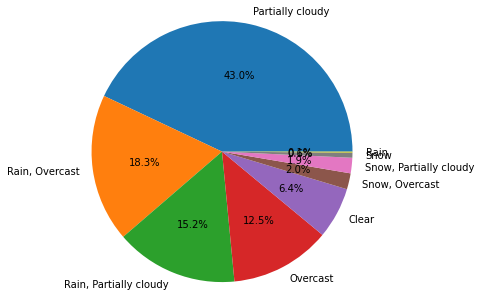

In [216]:
labels = pie.index 
plt.pie(pie, labels= labels,autopct='%.1f%%', radius=1.5)
plt.show()

In [ ]:
df_weather.to_csv('weatherData_Final.csv',index= False)